***PART 1 - LOADING LIBRARIES AND DATABASE***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')



In [ ]:
pd.options.display.max_columns = None #The dataset is huge. To see all of the columns, we change max columns
pd.options.display.max_seq_items=1000
pd.options.display.max_rows=1000

In [ ]:
db_v1= 'https://drive.google.com/file/d/1KdnyrBgasjIcO7wkgbqi0RST5igM1jNv/view?usp=sharing'
db_v2= 'https://drive.google.com/file/d/1XoqPujIOGHQStuAqM6Gzyqbkha4c5Y96/view?usp=sharing'
db_v3 = 'https://drive.google.com/file/d/1W1V3_hl7yqbWyXF8w7mZSDTxCOx3GMzf/view?usp=sharing'
db_v4 ='https://drive.google.com/file/d/19ERs5bmAdxEfgUmTxgfIBhUoT6xPHzZy/view?usp=sharing'
fname1 = db_v4
fname1='https://drive.google.com/uc?id=' + fname1.split('/')[-2]
dataset = pd.read_csv(fname1, low_memory=False)


In [ ]:
dataset.shape

(9408, 42)

In [ ]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Proposed Construction Type', 'Proposed Construction Type Description',
       'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID', 'address', 'lat', 'lon', 'Duration_construction_days',
       'Process_time_days', 'Year', 'Est_Cost_Infl', 'Rev_Cost_Infl',
       'Est_Cost_Infl_log10', 'Est_Cost_Infl_loge', 'lat_lon'],
      dtype='object')

#Columns in dataset

**Adress-related columns:**

       'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Neighborhoods - Analysis Boundaries', 'Zipcode,
       'Location',

       Added columns: 
       'address', 'lat', 'lon', 'lat_lon'

**Time-related columns:**

       'Current Status Date'
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 
       'Permit Expiration Date', 

        Added columns:
       'Duration_construction_days',
       'Process_time_days'

**Building type related columns:**

       'Permit Type', 'Permit Type Definition',
       'Description', 'Current Status',
       'Number of Proposed Stories',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Proposed Construction Type', 'Proposed Construction Type Description',

**Cost related columns:**

       'Estimated Cost', 'Revised Cost',

       Added columns:
       'Est_Cost_Infl', 'Rev_Cost_Infl',
       'Est_Cost_Infl_log10', 'Est_Cost_Infl_loge'

**SF ID-related columns:**

       'Permit Number', 
       'Site Permit', 'Supervisor District',
       'Record ID',

#Columns related to Dates and Duration

In the following, we will convert Date columns to Datetime. It will be useful to avoid problems with our visualizations.

In [ ]:
#selecting columns related to date
date_cols = [col for col in dataset.columns if 'date' in col.lower()]
#date_cols

*Let's check earliest and latest dates ...*

In [ ]:
for col in date_cols:
    dataset.loc[:,col] = pd.to_datetime(dataset[col], errors = 'coerce')
    print('Col :',col, ' Min= ', dataset.loc[:,col].min(), 'Max= ', dataset.loc[:,col].max())
    #we used errors = coerce, as there are some values/outliers out of the bound     

Col : Permit Creation Date  Min=  1977-10-19 00:00:00 Max=  2020-08-18 00:00:00
Col : Current Status Date  Min=  1982-01-25 00:00:00 Max=  2022-08-03 00:00:00
Col : Filed Date  Min=  1977-10-19 00:00:00 Max=  2020-08-18 00:00:00
Col : Issued Date  Min=  1978-06-13 00:00:00 Max=  2021-02-17 00:00:00
Col : Completed Date  Min=  1982-01-25 00:00:00 Max=  2022-08-03 00:00:00
Col : First Construction Document Date  Min=  1989-03-27 00:00:00 Max=  2022-06-16 00:00:00
Col : Permit Expiration Date  Min=  1980-10-29 00:00:00 Max=  2025-10-19 00:00:00


Here what we observe:

*   Permit creation records include data from 1977 to 2020.
*   Completed dates range from 1982 to 2022.



In [ ]:
dataset[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9408 entries, 0 to 9407
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Permit Creation Date              9408 non-null   datetime64[ns]
 1   Current Status Date               9408 non-null   datetime64[ns]
 2   Filed Date                        9408 non-null   datetime64[ns]
 3   Issued Date                       9405 non-null   datetime64[ns]
 4   Completed Date                    9408 non-null   datetime64[ns]
 5   First Construction Document Date  2573 non-null   datetime64[ns]
 6   Permit Expiration Date            9405 non-null   datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 514.6 KB


In [ ]:
m_date =dataset['Filed Date']  < dataset['Issued Date'] 
m_date.sum()

9374

Most of the date columns are filled with the data. 

First Construction Document Date columns is not neccessary for our case. We can leave it aside. 

We can see that Issued Dates are later than Filed Dates. 

It means that

       ▶ Filed Dates represent the date when the city of San Francisco receives the building permit demand from the companies and indivuals.

       ▶ Issued Dates represent the date when the city of San Francisco makes a response whether the building permit is accepted or not. 

The figure by SF shows the stages of building permit. It agrees with our estimations:

![development-pipeline-stages.png](data:image/png;base64,)
[ref-SFPlanning.org](https://sfplanning.org/project/pipeline-report#about)



We use Completed Date and Issued Date to calculate the estimated duration of construction. We estimate that construction companies start construction without any delays after their permit got issued. 

We use Permit Creation Date to fill Year column. We also use Year column to integrate inflation rate of USD dollar in our cost data.

▶ **Let's investigate the distribution of Duration and Year columns further.**

In [ ]:
print('\nDescription of permits with a building time less than 14 days - any possible outliers below?\n')
col_ = 'Duration_construction_days'
dataset.loc[dataset[col_]< 14,['Year','Description', 'Est_Cost_Infl','Permit Number']] #duration less than 10 days - possible outliers


Description of permits with a building time less than 14 days - any possible outliers below?



Year                          Description  Est_Cost_Infl Permit Number
69    1981                                  NaN  715432.343234       8102370
1114  1984                                  NaN  278793.965351       8408331
9327  1999  erect a communication antenna tower   59935.441176       9907098
9328  1999  erect a shack next to antenna tower   32529.411765       9907099

 📓 Last two rows are possible outliers

In [ ]:
print('\nDescription of permits with a building time more than 10 years - any possible outliers below?\n')
col_ = 'Duration_construction_days'
dataset.loc[dataset[col_]/365. >10 ,['Year','Description', 'Est_Cost_Infl','Permit Number']]


Description of permits with a building time more than 10 years - any possible outliers below?



Year                                        Description  Est_Cost_Infl  \
506   1983                                                NaN   1.904408e+07   
1363  1985                                                NaN   3.777463e+06   
2117  1987             two story - four unit residential bldg   8.348548e+05   
2118  1987             two story - four unit residential bldg   8.348548e+05   
2119  1987             two story - four unit residential bldg   8.348548e+05   
2120  1987             two story - four unit residential bldg   8.348548e+05   
2316  1987                   two story single family dwelling   4.293539e+05   
2405  1988            three story three unit residential bldg   4.581065e+05   
3070  1990                    erect a one story bus wash bldg   5.183053e+04   
3079  1990   erect a 25 story office/retail/parking structure   4.872070e+07   
3225  1991                              carport & parking lot   1.989501e+00   
3675  1992      erect a three story two unit residentail bldg   6.759765e+05   
4184  1996         erect a three story single family dwelling   3.454047e+05   
4239  1996               to erect 15 story 106 dwelling units   2.548059e+07   
4240  1996               to erect 15 story 106 dwelling units   2.548059e+07   
4241  1996               to erect 15 story 106 dwelling units   2.548059e+07   
4715  1998             4 story (12 live work) 1 story parking   3.075426e+06   
4741  1999         erect a three story single family dwelling   2.033088e+05   
5344  2000           to erect 2 story  museum & 9 story tower   1.447691e+08   
5358  2001  erect a 9 story 22 unit residential bldg with ...   4.590119e+06   
5651  2002     erect a four story three unit residential bldg   5.271790e+05   
5914  2004    erect a four story, three unit residential bldg   5.020619e+05   
5921  2004            erect four story single family dwelling   3.586157e+05   
6125  2005  bldg #29 - to erect 3 stories of 1 family dwel...   2.497419e+05   
8184  2001      to erect a new 4 story single family dwelling   2.754071e+05   
8535  1986                                                NaN   8.603792e+05   
9346  1995       erect a four story two unit residential bldg   8.890092e+05   

     Permit Number  
506       8304290S  
1363       8503887  
2117       8706635  
2118       8706635  
2119       8706635  
2120       8706635  
2316       8714201  
2405       8800120  
3070       9012076  
3079      9012523S  
3225       9100679  
3675      9220984S  
4184       9608438  
4239      9623103S  
4240      9623103S  
4241      9623103S  
4715       9824818  
4741      9901083S  
5344  200012188209  
5358  200101059321  
5651  200204103610  
5914  200402106098  
5921  200403309962  
6125  200504200419  
8184  200104277834  
8535       8604959  
9346      9521150S

 📓 Possible outliers: Residential buildings with < 5 stories and take more than 15 years of construction

**Let's analyze duration graphs**

In [ ]:

#We need to have a column of number of proposed stories where missing values and less represented values are gathered together
def cat_stories (st): 
    if st < 3 :
      y = '0-2 stories'
    elif st< 5 :
      y = '3-4 stories'
    elif st < 8 :
      y = '5-7 stories'
    elif st < 10 :
      y = '8-9 stories'
    else:
      y = '10+ stories'
    return y

col_ ='Number of Proposed Stories'
dataset[col_].value_counts()
dataset[col_+'_cat'] = dataset[col_].apply(lambda x: cat_stories(x)).astype(str)

#We need to have a column of time spent in construction in years 
dataset['Duration_construction_years'] = dataset['Duration_construction_days']/365

#Let's graph them

In [ ]:
#Graph 1 - Construction Duration Histogram
#Question: What is the duration of constructions? What parameters seem to affect it?

fig = px.histogram (dataset, x='Duration_construction_years',
                   title='Histogram of Construction Durations in San Francisco',
                   opacity=0.8,
                   marginal="box", 
                   color= 'Number of Proposed Stories_cat',
                   hover_data=dataset.columns,
                   range_x=[0, 10]
                   )

fig.update_xaxes(rangeslider_visible=False)

**Results:**

We observe that
1.   Most of the constructed buildings have 0 - 4 stories.
2.   To build 0-2 stories take approximately between *0.5 and 1.5 years*.  
3.   To build 3-4 stories take approximately between *1.0 and 2.0 years*. 
4.   To build 5-7 stories take approximately between *1.5 and 3.5 years*.
5.   To build 8-9 stories take approximately between *2.0 and 4.0 years*.
5.   To build tall buildings take approximately between *1.0 and 3.5 years*.

**Discussion:**

There are cases where the construction can take much larger than these central values.

What would be the reasons of these long construction delays? There can be unexpected delays in an ongoing construction due to late material delivery, financial problems, natural disasters like earthquakes, etc... Also, construction companies may have chosen to start their projects years after their permit being issued.

By rule of thumb, we expected taller buildings take much longer time to construct than buildings with fewer stories. It is pretty much observed except the buildings with more than 10 floors. It is due to not having equivalent amount of data in each category. 

**Idea(s):**

Should we flag some of them as outliers? Let's see the importance of construction duration later in ML part.  


In [ ]:
print("\nHere is the amount of data in each category\n")
dataset['Number of Proposed Stories_cat'].value_counts()


Here is the amount of data in each category



3-4 stories    5001
0-2 stories    3458
10+ stories     462
5-7 stories     365
8-9 stories     122
Name: Number of Proposed Stories_cat, dtype: int64

**Let's analyze number of constructions completed by year** 

What is the year distribution of new constuctions in San Francisco?

In [ ]:
fig = px.histogram (dataset, x='Completed Date',
                   title='Histogram of Completed Buildings in San Francisco',
                   opacity=0.8,
                   color='Number of Proposed Stories_cat',#"Permit Type Definition",
                   hover_data=['Number of Proposed Stories_cat']
                   )
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
            buttons=list([
            #dict(count=1, label="1m", step="month", stepmode="backward"),
            #dict(count=6, label="6m", step="month", stepmode="backward"),
            #dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(step="all")
        ])))
#fig.write_html("datevsnumberconstructions.html")

**Results:**

We observe that
1.   City of San Francisco had a very active construction market up to early 90s.

2.   Since 2004, there were fewer new construction projects in San Francisco. It is likely due to the lack of empty spaces, urban planning limits and recessions of 2001 and 2007 in the US economy. 

**Discussion:**

Tall buildings (10+ stories) were mostly built before 90s. Then there were very few tall building projects. It can be explained by the impact of the big San Francisco earthquake in 1989. It led both changes in building codes and demotivated the construction of tall buildings. Some other tall buildings were built after 2008 probably with the presence of giant tech companies in the region.

**Idea(s):**

San Francisco has been the center of Hippie movement in the 60s. A significant earthquake hit the city in '89. There were recessions in '90, 2001 and 2007. Can we identify the impacts of these important events on construction trends of SF?

Can we predict the trend of construction market in the near future in San Francisco? Let's decide on it if we have sufficient time in this project.


#Columns related to Location

In [ ]:
col_='Est_Cost_Infl'
dataset['Cost_1M'] = (dataset[col_]/1000000)

In [ ]:
#cost by zipcode
#(dataset.groupby('Zipcode')[[ 'Cost_1M']].describe()).round(2)#in 1M dollars

In [ ]:
#cost by Neighborhoods
table_cn = (dataset.groupby('Neighborhoods - Analysis Boundaries')[[ 'Cost_1M']].describe()).round(2) #in 1M dollars


In [ ]:
print('\nTop 5 neighborhoods with highest average construction cost')
table_cn.sort_values(by = ('Cost_1M',  'mean'),ascending = False).head(5)


Top 5 neighborhoods with highest average construction cost


Cost_1M                                    \
                                      count   mean    std   min    25%    50%   
Neighborhoods - Analysis Boundaries                                             
Financial District/South Beach        180.0  52.91  74.01  0.00   1.43  17.56   
Tenderloin                             57.0  40.91  40.47  0.02  10.76  27.24   
Mission Bay                           118.0  39.18  70.74  0.00   0.00  13.66   
Chinatown                              34.0  31.75  48.18  0.48   1.58   6.92   
South of Market                       320.0  13.71  35.86  0.00   0.50   1.45   

                                                    
                                       75%     max  
Neighborhoods - Analysis Boundaries                 
Financial District/South Beach       76.36  319.55  
Tenderloin                           44.51  152.39  
Mission Bay                          54.42  607.36  
Chinatown                            25.48  133.48  
South of Market                       7.11  337.09

In [ ]:
print('\nTop 5 neighborhoods with most active construction market since 80s\n')
table_cn.sort_values(by = ('Cost_1M',  'count'),ascending = False).head(5)


Top 5 neighborhoods with most active construction market since 80s



Cost_1M                                 \
                                      count  mean    std   min   25%   50%   
Neighborhoods - Analysis Boundaries                                          
Bayview Hunters Point                1543.0  1.33   4.90  0.00  0.24  0.35   
Other                                1088.0  4.93  19.13  0.00  0.34  0.56   
Mission                               490.0  5.08  29.90  0.00  0.49  0.85   
Potrero Hill                          454.0  2.73  12.54  0.01  0.26  0.52   
Outer Richmond                        420.0  0.77   0.78  0.00  0.54  0.66   

                                                   
                                      75%     max  
Neighborhoods - Analysis Boundaries                
Bayview Hunters Point                0.46   84.57  
Other                                1.63  319.55  
Mission                              2.22  451.60  
Potrero Hill                         0.71  171.69  
Outer Richmond                       0.78    7.81

**Results:**

We observe that
1.   Most expensive construction projects mostly took place in the vicinity of downtown San Francisco (Financial D/South B, Tenderloin, Mission Bay, Chinatown and South of Market). It is an expected trend as high rise building projects with more complex technologies take place mostly at the center of US cities.

2.   Most of the construction projects took place mosty in Bayview Hunters Point. Also, regions like Mission, Portero Hill and Outer Richmond had active construction efforts. These neighborhoods are located away from the city center. The urban planning strategy has been likely on the fact of expanding new constructions away from the city center. It have also likely provided more affordable housing.


**Idea(s):**

What is the typical number of floors built in these locations?

#Columns related to Cost

Let's see the impact of duration of construction on cost

In [ ]:
dataset['Proposed Use'].isna().sum()

322

In [ ]:
#m2 = (dataset ['Permit Type'] < 3)

In [ ]:

fig = px.scatter(dataset.dropna(subset=['Proposed Use']), x='Duration_construction_days', y="Estimated Cost", #hover_data=["Current Status"],
                 color='Proposed Use',log_y =True, range_x = [0,1e4])
                # hover_data=['Permit Type Definition']) #size='petal_length', #symbol

In [ ]:

fig.update_xaxes(rangeslider_visible=True,
                )
#constuction days may give an idea of superfice

In [ ]:

fig = px.scatter(dataset.dropna(subset=['Proposed Use']), x='Process_time_days', y="Estimated Cost", #hover_data=["Current Status"],
                 color='Year',log_y =True, range_x = [0,1e4])
                # hover_data=['Permit Type Definition']) #size='petal_length', #symbol
fig.update_xaxes(rangeslider_visible=True,
                )

In [ ]:
#fig.write_html("drive/MyDrive/colab/durationvscost_year.html")

#check if there are any correspandance between duration and year of construction ?

In [ ]:
#fig.show()

In [ ]:
"""
dataset['Duration_b']=dataset['Duration_b'].dt.days
fig = px.scatter(dataset.loc[m2,:], x="Duration_b", y="Estimated Cost", #hover_data=["Year"],
                 color='Permit Type',log_y =True, range_x = [0,1e4])
fig.write_html("drive/MyDrive/colab/duration_bvscost.html")
"""

'\ndataset[\'Duration_b\']=dataset[\'Duration_b\'].dt.days\nfig = px.scatter(dataset.loc[m2,:], x="Duration_b", y="Estimated Cost", #hover_data=["Year"],\n                 color=\'Permit Type\',log_y =True, range_x = [0,1e4])\nfig.write_html("drive/MyDrive/colab/duration_bvscost.html")\n'

In [ ]:
#fig.show()

In [ ]:
#dataset.columns

In [ ]:
#LI STOPPED HERE 09/08/22

#DATA VISUALISATION

***Let's explore our dataset***

In [ ]:
import seaborn as sns

In [ ]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Proposed Use', 'Proposed Units', 'Plansets',
       'Proposed Construction Type', 'Proposed Construction Type Description',
       'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID', 'address', 'lat', 'lon', 'Duration', 'Duration_b',
       'Process_time_days', 'Duration_construction_days', 'Year'],
      dtype='object')

In [ ]:
cols = ['Permit Type', 'Current Status',
        'Duration_construction_days', 'Year',
        'Estimated Cost', 'Revised Cost',
        'Neighborhoods - Analysis Boundaries', 'Zipcode',
        'Number of Proposed Stories',
        'Proposed Use', 'Proposed Units',
        'Proposed Construction Type','Proposed Construction Type Description',
        'Plansets'
       ]
newdf = dataset[cols]

newdf.shape

(9408, 14)

In [ ]:
newdf=newdf.sample(1000)#frac=0.01)#0.15)


fig, axes = plt.subplots(nrows = 10, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 40)

for ax, col in zip(axes, newdf.columns):
    sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen')
    #if 'cost' in col.lower():
    #  sns.histplot(data=newdf,y=col,kde=True,ax=ax,stat='density',color='forestgreen',log_scale=True)
    #ax.set_title(col)
    #print(col)
#fig.savefig('drive/MyDrive/colab/data_exploration_.png',dpi=800)
#fig.close()



Error in callback <function flush_figures at 0x7fc446448290> (for post_execute):


KeyboardInterrupt: ignored

***Let's analyze cost a bit more ***

We try to predict cost so it remains as our top priority.

In [ ]:
mask = dataset['Permit Type'] < 3

filtered_dataset = dataset.loc[mask, :]
filtered_dataset = filtered_dataset.dropna(subset=['Estimated Cost'])



In [ ]:
#descriptive statistics summary
filtered_dataset['Estimated Cost'].describe()

count    9.408000e+03
mean     2.744522e+06
std      1.410971e+07
min      1.000000e+00
25%      1.600000e+05
50%      2.816195e+05
75%      6.435875e+05
max      5.379586e+08
Name: Estimated Cost, dtype: float64

In [ ]:
filtered_dataset['Revised Cost'].describe()

count    4.932000e+03
mean     5.691194e+06
std      2.303632e+07
min      1.000000e+00
25%      2.870000e+05
50%      5.000000e+05
75%      1.481056e+06
max      7.805000e+08
Name: Revised Cost, dtype: float64

**There are much less data in revised cost*

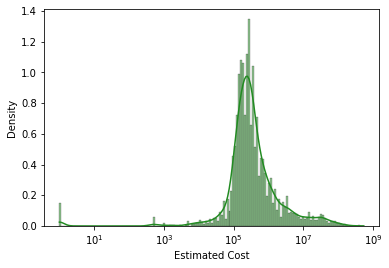

In [ ]:
#histogram
sns.histplot(data= filtered_dataset , x='Estimated Cost',kde=True,stat='density',color='forestgreen',log_scale=True)

***Let's check the skewedness of the distribution***

Since we observe

    Deviation from the normal distribution.
    positive skewness.
    peakedness.


In [ ]:
#skewness and kurtosis
print("Skewness: %f" % filtered_dataset['Estimated Cost'].skew())
print("Kurtosis: %f" % filtered_dataset['Estimated Cost'].kurt())

Skewness: 13.469670
Kurtosis: 282.835392


We will start by looking carefully at the relationship with other variables.

***Let's explore heatmap***

In [ ]:
newdf = filtered_dataset[cols]

KeyError: ignored

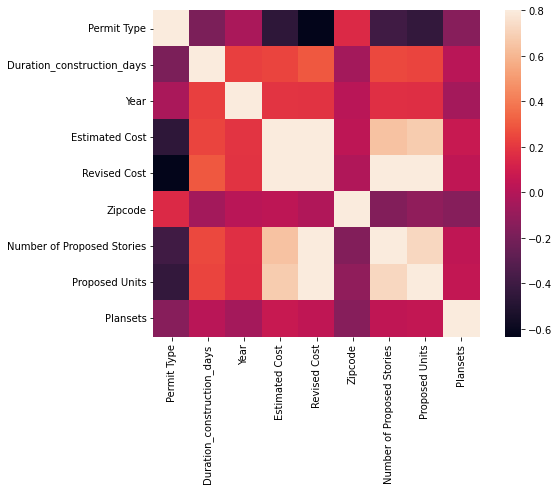

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(newdf.corr(), vmax=.8, square=True)
#fig.savefig('drive/MyDrive/colab/data_heatmap.jpg',dpi=400)

In [ ]:
k = 12 #number of variables for heatmap
corrm = newdf.corr()
cols = corrm.nlargest(k, 'Estimated Cost')['Estimated Cost'].index

In [ ]:
cols

Index(['Estimated Cost', 'Revised Cost', 'Proposed Units', 'Year',
       'Number of Proposed Stories', 'Duration', 'Plansets',
       'Number of Existing Stories', 'Zipcode', 'Existing Units',
       'Permit Type', 'Existing Construction Type'],
      dtype='object')

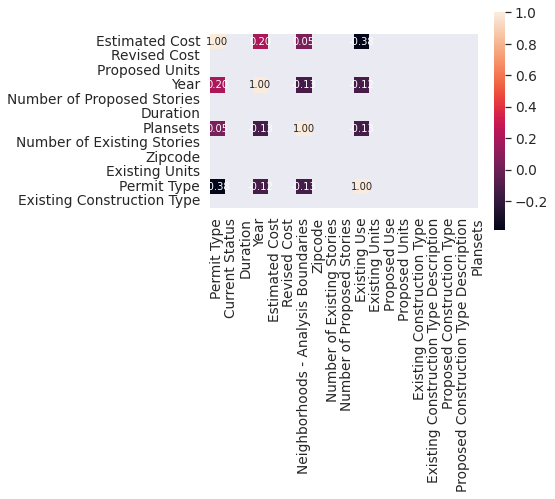

In [ ]:

# correlation matrix with numerical values
import numpy as np
cm = np.corrcoef(newdf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=newdf.columns.values)
plt.show()



**Observations of HeatMap**



*   List item
*   List item



**In summary **

we can conclude that 



*   List item
*   List item



***Trying history and normal probability plot**

In [ ]:
from scipy.stats import norm
from scipy import stats

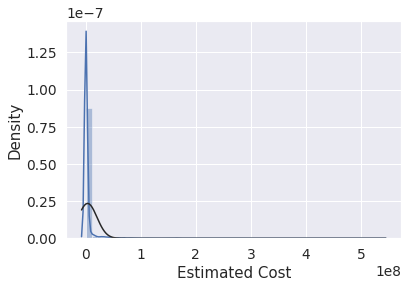

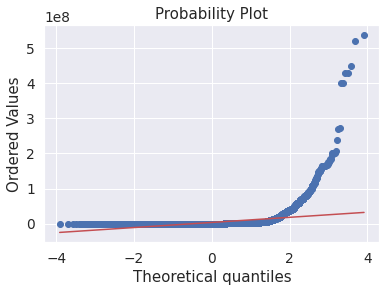

In [ ]:
#histogram and normal probability plot
sns.distplot(newdf['Estimated Cost'], fit=norm);
fig = plt.figure()
res = stats.probplot(newdf['Estimated Cost'], plot=plt)

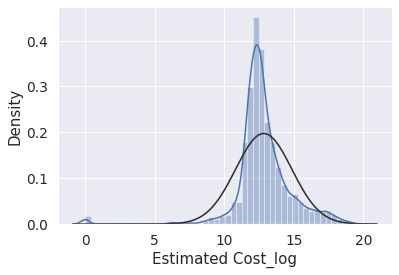

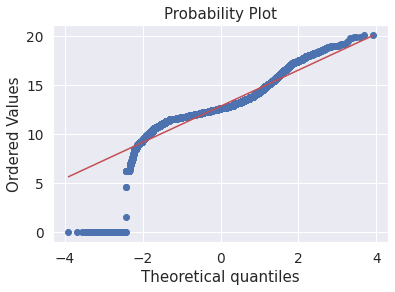

In [ ]:

#applying log transformation
newdf['Estimated Cost_log']= np.log(newdf['Estimated Cost'])

#histogram and normal probability plot
sns.distplot(newdf['Estimated Cost_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(newdf['Estimated Cost_log'], plot=plt)

*** Observations***



*   Log works much better
*   List item



In [ ]:
#need to repeat this step for other feautres
#ref. data cleaning and explotaory https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

***Check outliers***

#Imputing missing values
ref. https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

#Skewed features


In [ ]:

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [ ]:
numeric_feats = newdf.dtypes[newdf.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = newdf[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
Proposed Units              45.226581
Number of Proposed Stories  44.698522
Estimated Cost              13.468332
Revised Cost                11.783400
Plansets                     3.442893
Number of Existing Stories   0.822304
Year                         0.512291
Zipcode                      0.415880
Existing Units               0.000000
Existing Construction Type  -1.324471



Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x

.

Note that setting λ=0

is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    newdf[feat] = boxcox1p(newdf[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 13 skewed numerical features to Box Cox transform


let's investigate further what was done for the skewed columns

***Here I do feature engineering ***

In [ ]:
mask = dataset['Permit Type'] < 3

filtered_dataset = dataset.loc[mask, :]
#filtered_dataset.describe()
#filtered_dataset = filtered_dataset.dropna(subset=['Estimated Cost'])


In [ ]:
#newdf.describe()

In [ ]:
filtered_dataset['Proposed Construction Type'].value_counts().index

Index(['5.0', '1.0', '5', '2.0', '3.0', '4.0', '1', '3', '2', '4', 'III'], dtype='object')

In [ ]:
filtered_dataset['Proposed Construction Type']=filtered_dataset['Proposed Construction Type'].apply(lambda x : '3' if x =='III' else x)

In [ ]:
filtered_dataset['Proposed Construction Type']=filtered_dataset['Proposed Construction Type'].fillna('99').astype(float).astype(int)#.value_counts()

In [ ]:
filtered_dataset['Zipcode']=filtered_dataset['Zipcode'].fillna(0).astype(int)


In [ ]:
#filtered_dataset['Year'] 

In [ ]:
filtered_dataset['Year']=filtered_dataset['Year'].astype(int)
myear = filtered_dataset['Year'] > 1980

filtered_dataset=filtered_dataset.loc[myear,:]


In [ ]:
(~myear).sum()

64

In [ ]:
#filtered_dataset.describe()

In [ ]:
filtered_dataset['Current Status'].value_counts()

complete    9344
Name: Current Status, dtype: int64

In [ ]:
mstat= filtered_dataset['Current Status'] == 'complete'
#filtered_dataset['Duration'][mstat].describe()
filtered_dataset = filtered_dataset.loc[mstat,:]

In [ ]:
filtered_dataset['Duration_construction_days'].value_counts().index.min()

0.0

In [ ]:
#filtered_dataset['Duration'] = filtered_dataset['Duration'].fillna(0).apply(lambda x : 0 if x < 0 else x)
filtered_dataset['Duration_construction_days'].isna().sum()

3

In [ ]:
col_='Duration_construction_days'
filtered_dataset=filtered_dataset.dropna(subset =[col_])
m_days = filtered_dataset[col_] < 30
filtered_dataset.loc[m_days,'Proposed Use']

69                       NaN
1114       1 family dwelling
3915    food/beverage hndlng
6524            storage shed
8367                     NaN
8628            storage shed
9327                   tower
9328            storage shed
Name: Proposed Use, dtype: object

In [ ]:
#for neighbors less than 20 data, we use category 'other'

col_ = "Neighborhoods - Analysis Boundaries"
n_count = filtered_dataset[col_].value_counts()
m_ng = filtered_dataset[col_].isin(n_count.index[n_count.values < 20])
filtered_dataset.loc[m_ng,col_] = 'Other'
filtered_dataset[col_].fillna('Other',inplace=True)
filtered_dataset[col_].value_counts()
filtered_dataset[col_] =filtered_dataset[col_].astype('str')

In [ ]:
#category of proposed construction type
col_ = 'Proposed Construction Type'
n_count = filtered_dataset[col_].value_counts()
m_ng = filtered_dataset[col_].isin(n_count.index[n_count.values < 20])
filtered_dataset.loc[m_ng,col_] = '99'
filtered_dataset[col_].fillna('99',inplace=True)
filtered_dataset[col_].value_counts()
filtered_dataset[col_] =filtered_dataset[col_].astype('str')

In [ ]:
"""
m2b = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='Presidio'
filtered_dataset = filtered_dataset.loc[m2b,:]
m2c = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='McLaren Park'
filtered_dataset = filtered_dataset.loc[m2c,:]
m2d = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='Japantown'
filtered_dataset = filtered_dataset.loc[m2d,:]
m2c= filtered_dataset["Neighborhoods - Analysis Boundaries"].fillna('Zero')
"""
#filtered_dataset.loc[m2c,"Neighborhoods - Analysis Boundaries"]  =filtered_dataset.loc[m2c,"Zipcode"] 

'\nm2b = filtered_dataset["Neighborhoods - Analysis Boundaries"]!=\'Presidio\'\nfiltered_dataset = filtered_dataset.loc[m2b,:]\nm2c = filtered_dataset["Neighborhoods - Analysis Boundaries"]!=\'McLaren Park\'\nfiltered_dataset = filtered_dataset.loc[m2c,:]\nm2d = filtered_dataset["Neighborhoods - Analysis Boundaries"]!=\'Japantown\'\nfiltered_dataset = filtered_dataset.loc[m2d,:]\nm2c= filtered_dataset["Neighborhoods - Analysis Boundaries"].fillna(\'Zero\')\n'

In [ ]:
#m3a = filtered_dataset["Current Status"]=='Complete'
#filtered_dataset = filtered_dataset.loc[m3a,:]

In [ ]:
filtered_dataset['Estimated Cost'].isna().sum()

0

In [ ]:
filtered_dataset = filtered_dataset.dropna(subset=['Estimated Cost'])

In [ ]:
#removing estimated cost less than 5000 dollars
col_='Estimated Cost'
m_ecost = filtered_dataset [col_] < 5000
filtered_dataset=filtered_dataset.loc[~m_ecost,:]

filtered_dataset ['Estimated Cost_log10'] = filtered_dataset['Estimated Cost'].apply(lambda x : np.log10(x))
m_ecost.sum()

140

In [ ]:
filtered_dataset.shape

(9201, 40)

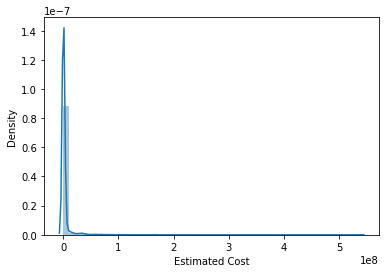

In [ ]:
#filtered_dataset.describe()
#histogram and normal probability plot
sns.distplot(filtered_dataset['Estimated Cost'])#, fit=norm)

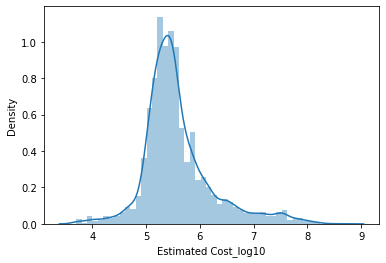

In [ ]:
sns.distplot(filtered_dataset['Estimated Cost_log10'])

In [ ]:
#sns.distplot(filtered_dataset['Duration'])

In [ ]:
filtered_dataset.to_csv('Building_Permits_v4.csv',index=False)

In [ ]:
#abc
#For filtering certain outliers, see the code below: 

"""
low, high = df.B.quantile([0.25,0.75])
df.query('{low}<B<{high}'.format(low=low,high=high))
"""

"\nlow, high = df.B.quantile([0.25,0.75])\ndf.query('{low}<B<{high}'.format(low=low,high=high))\n"

#MACHINE LEARNING



In [ ]:
#filtered_dataset["Street Name"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = [
    "Permit Type",
    #"Unit",
    #"Street Name",
    "Number of Proposed Stories", 
    "Plansets", 
    "Proposed Construction Type", 
    "Neighborhoods - Analysis Boundaries", 
    #"Zipcode",
    "Year",
    "Duration"
]

target_variable = "Estimated Cost_log10"#"Estimated Cost"

X = filtered_dataset.loc[:,features_list]
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())


Separating labels from features...
...Done.

Y : 
478    5.397940
856    7.653213
967    5.505150
978    5.243038
993    5.130212
Name: Estimated Cost_log10, dtype: float64

X :
     Permit Type  Number of Proposed Stories  Plansets  \
478            2                         4.0       2.0   
856            1                         5.0       4.0   
967            2                         4.0       2.0   
978            2                         3.0       2.0   
993            2                         3.0       2.0   

    Proposed Construction Type Neighborhoods - Analysis Boundaries  Year  \
478                          5                 Castro/Upper Market  1991   
856                          1                               Other  1991   
967                          5                               Other  1995   
978                          5                               Other  1995   
993                          5                               Other  1996   

     Duration  


In [ ]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Permit Type', 'Number of Proposed Stories', 'Plansets', 'Year', 'Duration']
Found categorical features  ['Proposed Construction Type', 'Neighborhoods - Analysis Boundaries']


In [ ]:
numeric_features=['Number of Proposed Stories', 'Duration']
categorical_features=['Plansets','Permit Type', 'Proposed Construction Type', 'Neighborhoods - Analysis Boundaries','Year'] #'Zipcode'

In [ ]:
#X.values

In [ ]:
#X_train

In [ ]:
# Divide dataset Train set & Test set 
#If we use Kfold we don't need this part!
#for X_train and Y_train we use all dataset since we use K-fold
#print("Dividing into train and test sets...")
X_train = X
Y_train = Y 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0, random_state=0)#,stratify=Y)
print("...Done.")
print()

...Done.



In [ ]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [ ]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [ ]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

"""
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
"""

Performing preprocessings on train set...
...Done.
     Permit Type  Number of Proposed Stories  Plansets  \
478            2                         4.0       2.0   
856            1                         5.0       4.0   
967            2                         4.0       2.0   
978            2                         3.0       2.0   
993            2                         3.0       2.0   

    Proposed Construction Type Neighborhoods - Analysis Boundaries  Year  \
478                          5                 Castro/Upper Market  1991   
856                          1                               Other  1991   
967                          5                               Other  1995   
978                          5                               Other  1995   
993                          5                               Other  1996   

     Duration  
478     815.0  
856    1100.0  
967     528.0  
978     496.0  
993     662.0  



'\n# Preprocessings on test set\nprint("Performing preprocessings on test set...")\nprint(X_test.head()) \nX_test = preprocessor.transform(X_test) # Don\'t fit again !! The test set is used for validating decisions\n# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.\n# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.\nprint(\'...Done.\')\nprint(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore\nprint()\n'

In [ ]:
np.isnan(Y_train).sum()

0

In [ ]:
#libraries ref. https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



---rephrase---

Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation


In [ ]:
#Validation function
n_folds = 3

#sqrt of negative mean error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
rmse= np.sqrt(-cross_val_score(regressor0, X_train, 10**Y_train, scoring="neg_mean_squared_error", cv = kf)) 
rmse

array([ 4765866.11234048,  9591472.02283103, 23791779.26532834])

In [ ]:
#R2

def R2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train)
    R2= cross_val_score(model, X_train, Y_train, scoring="r2", cv = kf)
    return(R2)

In [ ]:
#‘explained_variance’

In [ ]:
#Defining rmsle function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



Base models

    Linear Regression :

No, we dont apply Robustscaler()!
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline


In [ ]:
regressor0= LinearRegression()


    LASSO Regression :



In [ ]:
lasso = Lasso(alpha =0.0005, random_state=0)
#make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))



    Elastic Net Regression :

again made robust to outliers


In [ ]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0)
#make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

Kernel Ridge Regression :

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)



    Gradient Boosting Regression :

With huber loss that makes it robust to outliers


In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)

XGBoost :

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1)

**LightGBM - Gradient Boosting With LightGBM**

LightGBM is an algorithm developed by Microsoft in 2017. It has an advantage of changing the training algorithm that make the run time faster and likely result in a more effective model.

Ref. to the LightGBM algorithm paper:

    LightGBM: A Highly Efficient Gradient Boosting Decision Tree, 2017.
link : https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


#Base models scores

Let's see how these base models perform on the data by evaluating the cross-validation rmsle error


In [ ]:

model = regressor0
print("\nLinear regressor model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


Linear regressor model

R2 score - mean : 0.3670  |  std : 0.1367


RMSLE regressor score - mean : 0.5193  |  std : 0.1325



In [ ]:
model = lasso

print("\nLasso model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


Lasso model

R2 score - mean : 0.3418  |  std : 0.0878


RMSLE regressor score - mean : 0.5261  |  std : 0.1016



In [ ]:
model = ENet
print("\nElastic Net regressor model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))



Elastic Net regressor model

R2 score - mean : 0.3429  |  std : 0.0910


RMSLE regressor score - mean : 0.5259  |  std : 0.1041



In [ ]:
model = KRR
print("\nKernel Ridge model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


Kernel Ridge model

R2 score - mean : 0.4033  |  std : 0.0788


RMSLE regressor score - mean : 0.5006  |  std : 0.0950



In [ ]:
model = GBoost
print("\nGradient Boosting model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))



Gradient Boosting model

R2 score - mean : 0.5470  |  std : 0.0176


RMSLE regressor score - mean : 0.4364  |  std : 0.0715



In [ ]:
model = model_xgb
print("\n XGBoost model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


 XGBoost model

R2 score - mean : 0.5529  |  std : 0.0344


RMSLE regressor score - mean : 0.4345  |  std : 0.0803



In [ ]:
model = model_lgb
print("\nLGBM model\n")
score_1 = R2_cv(model)
print("R2 score - mean : {:.4f}  |  std : {:.4f}\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(model)
print("\nRMSLE regressor score - mean : {:.4f}  |  std : {:.4f}\n".format(score_2.mean(), score_2.std()))


LGBM model

R2 score - mean : 0.5391  |  std : 0.0337


RMSLE regressor score - mean : 0.4382  |  std : 0.0610



In [ ]:
score_1

array([0.49359094, 0.57428782, 0.5493392 ])

In [ ]:
score_2

array([0.37818373, 0.41443536, 0.52190058])

***Add your observations and conclusions here***

NameError: ignored

***Conclusions ***

Stopped here 11/08/22


*** Conclusion : ***
Comment on your results